<a href="https://colab.research.google.com/github/flaviod08/FatecAgrocomputacaoMT/blob/main/desafionuvemipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalando o psycopg2
!pip install psycopg2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importando as bibliotecas necessárias para o desenvolvimento do nosso notebook.
import psycopg2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [ ]:
# Função para criar conexão no banco
def conecta_db():
  con = psycopg2.connect(host='db-processo-seletivo.cap9ctizwjy9.sa-east-1.rds.amazonaws.com', 
                         database='postgres',
                         user='postgres', 
                         password='jzpqGciB3CiRC6')
  return con

In [ ]:
# Função para consultas no banco
def consultar_db(sql):
  con = conecta_db()
  cur = con.cursor()
  cur.execute(sql)
  recset = cur.fetchall()
  registros = []
  for rec in recset:
    registros.append(rec)
  con.close()
  return registros

In [ ]:
talhao1 = consultar_db('select * from talhao') 

In [ ]:
# Tranformando os dados da consulta no PostegreSQL em DataFrame - TABELA talhao
df_talhao = pd.DataFrame(talhao1, columns=['id_talhao','fazenda_nome','setor_nome',
                                   'codigo_talhao','textura_solo_descricao',
                                   'hectares','safra',
                                   'safra_data_inicio','safra_data_fim', 'safra_periodo', 'safra_periodo_inicio','safra_periodo_fim','ocupacao','variedade_grupo','variedade','ciclo_dias', 'data_plantio_inicio', 'data_plantio_fim','data_emergencia', 'data_colheita_inicio', 'data_colheita_fim', 'area_colhida', 'peso_colhido', 'produtividade', 'estande_planta','utimo_estadio_fenologico','base_metereo_codigo', 'base_metereo_altitude','periodo_safra_classe'])
df_talhao.head(2)

,id_talhao,fazenda_nome,setor_nome,codigo_talhao,textura_solo_descricao,hectares,safra,safra_data_inicio,safra_data_fim,safra_periodo,...,data_colheita_inicio,data_colheita_fim,area_colhida,peso_colhido,produtividade,estande_planta,utimo_estadio_fenologico,base_metereo_codigo,base_metereo_altitude,periodo_safra_classe
0,30598,F6,79,251,Media 15%-35%,0.0,Safra 18/19,2018-01-01,2020-01-31,218,...,None,None,0.0,0.0,None,0.00,None,34,673,Safrinha
1,19661,F6,79,251,Media 15%-35%,28.004126,Safra 15/16,2015-01-01,2017-05-01,56,...,2016-07-23,2016-07-23,27.75,215720.5,7773.711711711711,2.60,V9,34,673,Safrinha


In [ ]:
#met1 = consultar_db('select * from meteorologia')

In [ ]:
# Tranformando os dados da consulta no PostegreSQL em DataFrame tabela metereologia
# df_meteorologia = pd.DataFrame(met1, columns=['id_talhao','fazenda','setor_fazenda',
#                                   'talhao_codigo','periodo_safra',
#                                   'ocupacao','grupo_variedade',
#                                   'variedade','periodo_pluviometrico_inicio', 'periodo_pluviometrico_fim', 'data_leitura','leitura_posicao','leitura_valor','safra'])
#df_meteorologia.head(10)

In [ ]:
# checando os dados

print('Informações sobre o dataset: \n')

print('Número de linhas: \t {}\n'.format(df_talhao.shape[0]))
print('Número de colunas: \t {}\n'.format(df_talhao.shape[1]))

#Informações sobre as colunas e os tipos de dados:

print('Informações sobre as colunas e os tipos de dados: \n')
df_talhao.info()

Informações sobre o dataset: 

Número de linhas: 	 34287

Número de colunas: 	 29

Informações sobre as colunas e os tipos de dados: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34287 entries, 0 to 34286
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_talhao                 34287 non-null  object
 1   fazenda_nome              34287 non-null  object
 2   setor_nome                34287 non-null  object
 3   codigo_talhao             34287 non-null  object
 4   textura_solo_descricao    32827 non-null  object
 5   hectares                  30607 non-null  object
 6   safra                     34287 non-null  object
 7   safra_data_inicio         34287 non-null  object
 8   safra_data_fim            34287 non-null  object
 9   safra_periodo             34287 non-null  object
 10  safra_periodo_inicio      0 non-null      object
 11  safra_periodo_fim         0 non-null      object


In [ ]:
## Todas os dados estavam como object, convertendo o type para num. e data para facilitar o manuseio
df_talhao['hectares'] = df_talhao['hectares'].astype(float)
df_talhao['area_colhida'] = df_talhao['area_colhida'].astype(float)
df_talhao['peso_colhido'] = df_talhao['peso_colhido'].astype(float)
df_talhao['produtividade'] = df_talhao['produtividade'].astype(float)
df_talhao['estande_planta'] = df_talhao['estande_planta'].astype(float)

#Convertendo em data
df_talhao['safra_data_inicio'] = pd.to_datetime(df_talhao['safra_data_inicio'])
df_talhao['safra_data_fim'] = pd.to_datetime(df_talhao['safra_data_fim'])
df_talhao['data_plantio_inicio'] = pd.to_datetime(df_talhao['data_plantio_inicio'])
df_talhao['data_emergencia'] = pd.to_datetime(df_talhao['data_emergencia'])
df_talhao['data_colheita_inicio'] = pd.to_datetime(df_talhao['data_colheita_inicio'])



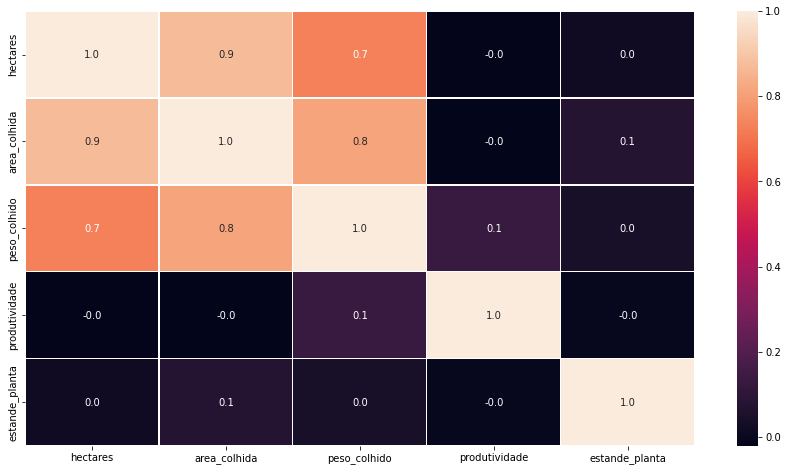

In [ ]:
# Vamos ver se o que eu tenho de valor (int, float) para analisar possui correlação com a produtividade 
correlation = df_talhao.corr()

# plot da matriz de correlação
plt.figure(figsize = (15,8))
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.10)
plot

- há correlação de algum componente com a produtividade? Não. 

In [ ]:
# Definir uma cultura para estudo - Soja
# Diminuir a quantidade de variáveis deixando apenas safra, id_talhao, estande_planta
df_soja = df_talhao[(df_talhao['ocupacao']== 'Soja')]
df_soja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14643 entries, 4 to 34285
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_talhao                 14643 non-null  object        
 1   fazenda_nome              14643 non-null  object        
 2   setor_nome                14643 non-null  object        
 3   codigo_talhao             14643 non-null  object        
 4   textura_solo_descricao    14330 non-null  object        
 5   hectares                  13472 non-null  float64       
 6   safra                     14643 non-null  object        
 7   safra_data_inicio         14643 non-null  datetime64[ns]
 8   safra_data_fim            14643 non-null  datetime64[ns]
 9   safra_periodo             14643 non-null  object        
 10  safra_periodo_inicio      0 non-null      object        
 11  safra_periodo_fim         0 non-null      object        
 12  ocupacao          

In [ ]:
### Vou selecionar algumas colunas que considero importante e visualizar os dados que elas contém a fim de achar algo que eu possa analisar
var_analise_soja = df_soja[['fazenda_nome','id_talhao','codigo_talhao','textura_solo_descricao','ocupacao', 'safra','produtividade']]
var_analise_soja.head(20)

,fazenda_nome,id_talhao,codigo_talhao,textura_solo_descricao,ocupacao,safra,produtividade
4,F6,2339,251,Media 15%-35%,Soja,Safra 13/14,2061.279279
5,F6,17178,252,Argilosa 35%-60%,Soja,Safra 15/16,4272.182134
9,F6,4392,252,Argilosa 35%-60%,Soja,Safra 12/13,NaN
10,F6,21943,252,Argilosa 35%-60%,Soja,Safra 16/17,5253.014966
11,F6,29776,252,Argilosa 35%-60%,Soja,Safra 18/19,4222.518960
14,F6,639,252,Argilosa 35%-60%,Soja,Safra 07/08,NaN
15,F6,33257,252,Argilosa 35%-60%,Soja,Safra 19/20,6533.623973
20,F6,2855,252,Argilosa 35%-60%,Soja,Safra 11/12,NaN
21,F6,2335,252,Argilosa 35%-60%,Soja,Safra 13/14,5514.147792
22,F6,25251,252,Argilosa 35%-60%,Soja,Safra 17/18,6873.738892


In [ ]:
# está com muita linha, o que dificulta a visualização. Como não temos dados de produtividade em algumas safras, as mesmas serão excluídas.

var_analise_soja.tail(10)


,fazenda_nome,id_talhao,codigo_talhao,textura_solo_descricao,ocupacao,safra,produtividade
34268,F6,932,300,Arenosa 0%-15%,Soja,Safra 07/08,NaN
34269,F6,20634,300,Arenosa 0%-15%,Soja,Safra 16/17,4446.179265
34275,F6,3047,300,Arenosa 0%-15%,Soja,Safra 11/12,NaN
34277,F6,25294,300,Arenosa 0%-15%,Soja,Safra 17/18,5040.974804
34278,F6,8935,300,Arenosa 0%-15%,Soja,Safra 09/10,NaN
34280,F6,29737,300,Arenosa 0%-15%,Soja,Safra 18/19,5279.533251
34281,F6,2299,300,Arenosa 0%-15%,Soja,Safra 13/14,3148.533664
34283,F6,1626,300,Arenosa 0%-15%,Soja,Safra 08/09,NaN
34284,F6,14327,300,Arenosa 0%-15%,Soja,Safra 14/15,3218.855845
34285,F6,3171,300A,Arenosa 0%-15%,Soja,Safra 11/12,NaN


In [ ]:
#excluindo valores nulos
var_analise_soja_clean = var_analise_soja.copy()
var_analise_soja_clean.dropna(axis=0,inplace=True)
var_analise_soja_clean.tail(100)

,fazenda_nome,id_talhao,codigo_talhao,textura_solo_descricao,ocupacao,safra,produtividade
33864,F6,17104,288,Media 15%-35%,Soja,Safra 15/16,5776.621090
33865,F6,25282,288,Media 15%-35%,Soja,Safra 17/18,6110.821939
33866,F6,29033,288,Media 15%-35%,Soja,Safra 18/19,4655.414854
33869,F6,21858,288,Media 15%-35%,Soja,Safra 16/17,5204.086389
33887,F6,17111,289,Argilosa 35%-60%,Soja,Safra 15/16,7103.887576
...,...,...,...,...,...,...,...
34269,F6,20634,300,Arenosa 0%-15%,Soja,Safra 16/17,4446.179265
34277,F6,25294,300,Arenosa 0%-15%,Soja,Safra 17/18,5040.974804
34280,F6,29737,300,Arenosa 0%-15%,Soja,Safra 18/19,5279.533251
34281,F6,2299,300,Arenosa 0%-15%,Soja,Safra 13/14,3148.533664


In [ ]:
#agrupamento por safra e descrição da est da produtividade

prod_safra = var_analise_soja_clean.groupby('safra')
desc_prod_safra = prod_safra.describe()
media_prod_safra 

produtividade                                           \
                    count          mean           std          min   
safra                                                                
Safra 13/14         977.0   4993.210858  1.269448e+03   909.722222   
Safra 14/15        1265.0   5299.929238  1.228086e+03  1089.285714   
Safra 15/16        1143.0   5492.827554  3.544741e+03  1028.166667   
Safra 16/17        1241.0   7191.779682  5.608026e+04   129.304304   
Safra 17/18        1246.0   8456.525092  5.464292e+04  1864.453125   
Safra 18/19        1197.0  50630.222186  1.086699e+06   755.368223   
Safra 19/20        1040.0   6864.605553  2.982850e+04   767.233239   

                                                                  
                     25%          50%          75%           max  
safra                                                             
Safra 13/14  4263.054844  5306.303972  5892.732975  7.962786e+03  
Safra 14/15  4452.872966  5366.998221  6142.891320  1.338571e+04  
Safra 15/16  4409.816678  5396.297489  6462.663715  1.142690e+05  
Safra 16/17  4827.333333  5795.954778  6446.942580  1.980198e+06  
Safra 17/18  5501.952405  6172.810570  6785.745088  1.650165e+06  
Safra 18/19  5059.909260  5887.509158  6433.821355  2.659883e+07  
Safra 19/20  5369.366080  6163.191040  6684.059661  9.672442e+05

In [ ]:
#analisando os dados acima, podemos inferir que a safra 18/19 obteve uma produtividade maior dentre as demais safras em nosso banco de dados

In [ ]:
# selecionao a safra 18/19 pra análise
est_soja_safra18_19 = var_analise_soja_clean[(var_analise_soja_clean['safra']== 'Safra 18/19')]
est_soja_safra18_19

,fazenda_nome,id_talhao,codigo_talhao,textura_solo_descricao,ocupacao,safra,produtividade
11,F6,29776,252,Argilosa 35%-60%,Soja,Safra 18/19,4222.518960
42,F6,29916,252A,Argilosa 35%-60%,Soja,Safra 18/19,2557.383041
53,F6,29664,253,Media 15%-35%,Soja,Safra 18/19,5484.130989
82,F6,29785,254,Argilosa 35%-60%,Soja,Safra 18/19,5344.906255
120,F6,29731,265,Argilosa 35%-60%,Soja,Safra 18/19,5312.224449
...,...,...,...,...,...,...,...
34157,F6,28926,297,Argilosa 35%-60%,Soja,Safra 18/19,5883.930674
34198,F6,29040,298,Argilosa 35%-60%,Soja,Safra 18/19,5688.283262
34231,F6,29044,299,Media 15%-35%,Soja,Safra 18/19,3761.904762
34259,F6,29901,299A,Media 15%-35%,Soja,Safra 18/19,4514.503390


In [ ]:
#agrupamento por talhão e média da produtividade
tal_group = est_soja_safra18_19.groupby('codigo_talhao')
desc_prod_tal = tal_group.describe()
desc_prod_tal


produtividade                                             \
                      count          mean           std            min   
codigo_talhao                                                            
01                      1.0  6.034946e+03           NaN    6034.946483   
02                      1.0  6.905536e+03           NaN    6905.536013   
03                      1.0  6.832967e+03           NaN    6832.966507   
04                      1.0  6.833093e+03           NaN    6833.092949   
05                      1.0  6.322998e+03           NaN    6322.997512   
...                     ...           ...           ...            ...   
98                      4.0  5.721329e+03  9.418712e+02    4356.976725   
99                      5.0  5.324763e+06  1.189257e+07    5363.834762   
99-A                    1.0  5.779265e+03           NaN    5779.265149   
9A                      2.0  5.020271e+03  2.313438e+03    3384.422942   
STSOJA                  2.0  1.361790e+07  1.835781e+07  636963.696370   

                                                                       
                        25%           50%           75%           max  
codigo_talhao                                                          
01             6.034946e+03  6.034946e+03  6.034946e+03  6.034946e+03  
02             6.905536e+03  6.905536e+03  6.905536e+03  6.905536e+03  
03             6.832967e+03  6.832967e+03  6.832967e+03  6.832967e+03  
04             6.833093e+03  6.833093e+03  6.833093e+03  6.833093e+03  
05             6.322998e+03  6.322998e+03  6.322998e+03  6.322998e+03  
...                     ...           ...           ...           ...  
98             5.482150e+03  6.038433e+03  6.277612e+03  6.451474e+03  
99             5.778978e+03  6.366656e+03  7.471334e+03  2.659883e+07  
99-A           5.779265e+03  5.779265e+03  5.779265e+03  5.779265e+03  
9A             4.202347e+03  5.020271e+03  5.838194e+03  6.656118e+03  
STSOJA         7.127431e+06  1.361790e+07  2.010837e+07  2.659883e+07  

[452 rows x 8 columns]